In [198]:
# Dependencies
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from pandas.tseries.offsets import MonthEnd

In [199]:
#Create file path 
#reference: https://www.zillow.com/research/data/ 
#mid-tier ZHVI
csvpath_zillow=os.path.join('..','Zillow.csv')
csvpath_covid=os.path.join('..','Covid_data_csv')

In [200]:
#Pass the path into the read_csv(), this will create a dataframe from your file
zillow_df=pd.read_csv(csvpath_zillow)
covid_df=pd.read_csv(csvpath_covid)

In [201]:
covid_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,United States,2020,1,2020-01-04,60167.0,55021.0,846.0,11568.0,1827.0,2530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2020,2,2020-01-11,60722.0,55739.0,867.0,11963.0,1939.0,2564.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2020,3,2020-01-18,59352.0,54518.0,831.0,11707.0,1819.0,2489.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2020,4,2020-01-25,59139.0,54392.0,829.0,11879.0,1860.0,2514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,5,2020-02-01,58801.0,54005.0,811.0,11959.0,1826.0,2476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,9,0,California,State,CA,163427.0,163201.0,163062.0,162790.0,162615.0,...,580304.0,583543.0,585655.0,587691.0,591769.0,598111.0,605587.0,613126.0,620823.0,628535.0
1,54,1,Texas,State,TX,97365.0,97390.0,97421.0,97547.0,97688.0,...,210297.0,211095.0,211941.0,212850.0,213926.0,215218.0,216773.0,218695.0,220821.0,223085.0
2,43,2,New York,State,NY,120867.0,120591.0,120428.0,120180.0,120080.0,...,274300.0,275308.0,276324.0,277580.0,279239.0,281331.0,283862.0,286780.0,289940.0,293216.0
3,14,3,Florida,State,FL,103529.0,103634.0,103756.0,103985.0,104205.0,...,262611.0,264018.0,265393.0,266762.0,268174.0,270102.0,272382.0,274912.0,277488.0,280248.0
4,21,4,Illinois,State,IL,141951.0,141693.0,141367.0,140982.0,140453.0,...,208609.0,209014.0,209467.0,210034.0,210983.0,212268.0,214003.0,215944.0,217983.0,220012.0


In [203]:
#Start Data at State Name 
zlw1=zillow_df[zillow_df.columns[4:]]
zlw1.head()

,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,CA,163427.0,163201.0,163062.0,162790.0,162615.0,162481.0,162406.0,162411.0,162460.0,...,580304.0,583543.0,585655.0,587691.0,591769.0,598111.0,605587.0,613126.0,620823.0,628535.0
1,TX,97365.0,97390.0,97421.0,97547.0,97688.0,97804.0,97895.0,98009.0,98160.0,...,210297.0,211095.0,211941.0,212850.0,213926.0,215218.0,216773.0,218695.0,220821.0,223085.0
2,NY,120867.0,120591.0,120428.0,120180.0,120080.0,120013.0,119933.0,119856.0,119812.0,...,274300.0,275308.0,276324.0,277580.0,279239.0,281331.0,283862.0,286780.0,289940.0,293216.0
3,FL,103529.0,103634.0,103756.0,103985.0,104205.0,104447.0,104677.0,104884.0,105029.0,...,262611.0,264018.0,265393.0,266762.0,268174.0,270102.0,272382.0,274912.0,277488.0,280248.0
4,IL,141951.0,141693.0,141367.0,140982.0,140453.0,140137.0,139701.0,140163.0,140876.0,...,208609.0,209014.0,209467.0,210034.0,210983.0,212268.0,214003.0,215944.0,217983.0,220012.0


In [204]:
#Filter to begin at StateName 
zlw2=zlw1[list(zlw1.columns[0:1])+list(zlw1.columns[289:])]
zlw2.head()

,StateName,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,CA,572862.0,576594.0,580304.0,583543.0,585655.0,587691.0,591769.0,598111.0,605587.0,613126.0,620823.0,628535.0
1,TX,209167.0,209615.0,210297.0,211095.0,211941.0,212850.0,213926.0,215218.0,216773.0,218695.0,220821.0,223085.0
2,NY,272709.0,273504.0,274300.0,275308.0,276324.0,277580.0,279239.0,281331.0,283862.0,286780.0,289940.0,293216.0
3,FL,259937.0,261192.0,262611.0,264018.0,265393.0,266762.0,268174.0,270102.0,272382.0,274912.0,277488.0,280248.0
4,IL,207939.0,208190.0,208609.0,209014.0,209467.0,210034.0,210983.0,212268.0,214003.0,215944.0,217983.0,220012.0


In [205]:
#Reshape data  
zlw3 = pd.melt(zlw2,'StateName', var_name='Month', value_name='Home Value')
zlw3['Month'] = zlw3['Month'].str.slice(0,7)
zlw3

,StateName,Month,Home Value
0,CA,2020-01,572862.0
1,TX,2020-01,209167.0
2,NY,2020-01,272709.0
3,FL,2020-01,259937.0
4,IL,2020-01,207939.0
...,...,...,...
607,AK,2020-12,312877.0
608,ND,2020-12,243322.0
609,VT,2020-12,279737.0
610,DC,2020-12,758867.0


In [206]:
#Abbreviate States by using a Dictionary
us_state_abbrev={'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}
    

In [207]:
#Remove United States and New York City from data to only reflect states
cvd1 = covid_df.loc[~(covid_df['Jurisdiction of Occurrence'].isin(['United States','New York City'])), ['Jurisdiction of Occurrence', 'Week Ending Date', 'All Cause']]
cvd1['Month'] = cvd1['Week Ending Date'].str.slice(0,7)
cvd1=cvd1[cvd1["Jurisdiction of Occurrence"]!='PR']
cvd1.replace(us_state_abbrev, inplace=True)
cvd1.rename(columns={'Jurisdiction of Occurrence':'StateName'}, inplace=True)
cvd1

,StateName,Week Ending Date,All Cause,Month
55,AL,2020-01-04,1081.0,2020-01
56,AL,2020-01-11,1127.0,2020-01
57,AL,2020-01-18,1039.0,2020-01
58,AL,2020-01-25,1055.0,2020-01
59,AL,2020-02-01,1026.0,2020-02
...,...,...,...,...
2961,PR,2020-12-12,123.0,2020-12
2962,PR,2020-12-19,139.0,2020-12
2963,PR,2020-12-26,85.0,2020-12
2964,PR,2021-01-02,36.0,2021-01


In [208]:
grouped_df=cvd1.groupby(["Month","StateName"])
cvd2=grouped_df["All Cause"].sum().reset_index()
cvd2["StateName"].value_counts().count()

52

In [209]:
#Filter out 2021 Data to only include 2020
cvd3=cvd2[cvd2["Month"]!="2021-01"]
cvd3

,Month,StateName,All Cause
0,2020-01,AK,390.0
1,2020-01,AL,4302.0
2,2020-01,AR,2631.0
3,2020-01,AZ,5281.0
4,2020-01,CA,23423.0
...,...,...,...
619,2020-12,VT,493.0
620,2020-12,WA,5231.0
621,2020-12,WI,5846.0
622,2020-12,WV,964.0


In [210]:
final_df = pd.merge(cvd1, zlw3, on=['StateName', 'Month'], how='left')
final_df=final_df.dropna()
final_df = final_df.rename(columns={"All Cause": "Cases of Death"})
final_df.head()

,StateName,Week Ending Date,Cases of Death,Month,Home Value
0,AL,2020-01-04,1081.0,2020-01,145216.0
1,AL,2020-01-11,1127.0,2020-01,145216.0
2,AL,2020-01-18,1039.0,2020-01,145216.0
3,AL,2020-01-25,1055.0,2020-01,145216.0
4,AL,2020-02-01,1026.0,2020-02,146019.0


<IPython.core.display.Javascript object>


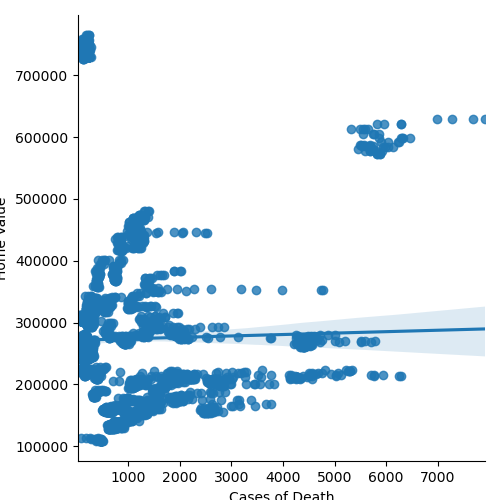

In [197]:
#Scatter plot with the datapoints and a regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

sns.lmplot(x="Cases of Death", y="Home Value", data=final_df)
plt.show()  

In [216]:
#Sum of deaths per month 
final_df_1 = final_df[["Month", "Cases of Death"]]
final_df_1= final_df_1.groupby(['Month']).sum().reset_index()
final_df_1

,Month,Cases of Death
0,2020-01,234777.0
1,2020-02,289421.0
2,2020-03,233970.0
3,2020-04,277704.0
4,2020-05,312606.0
5,2020-06,228853.0
6,2020-07,244745.0
7,2020-08,309235.0
8,2020-09,233484.0
9,2020-10,290766.0


In [217]:
#Find average home value per month 
final_df_2 = final_df[["Month", "Home Value"]]
final_df_2= final_df_2.groupby(['Month']).mean().reset_index()
final_df_2

,Month,Home Value
0,2020-01,265966.941176
1,2020-02,266997.686275
2,2020-03,268092.058824
3,2020-04,269299.039216
4,2020-05,270502.019608
5,2020-06,271775.803922
6,2020-07,273335.196078
7,2020-08,275383.078431
8,2020-09,277839.784314
9,2020-10,280609.764706


In [218]:
#combining sum of deaths and average home value per month 

final_df_merged = pd.merge(final_df_1, final_df_2, on=['Month'], how='left')


In [219]:
import matplotlib.pyplot as plt

In [ ]:
fig1 = plt.figure()

# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot()
bar1 = final_df_merged["Home Value"].plot(kind='bar', color='y')
plt.ylabel("Home Value ($)")
plt.legend()
plt.ylim(0,350000)
ax1.tick_params(axis='x', labelbottom=False)
 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(sharex=ax1, frameon=False)
line1 = final_df_merged["Cases of Death"].plot(kind='line', marker='d', secondary_y=True)
plt.ylabel("Cases of Death")
plt.legend()

#labeling the x axis with months 
labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Nov', 'Dec']
plt.xticks([0,1,2,3,4,5,6,7,8], labels)
 
#labels
plt.title("Home Value and Deaths by Month")
plt.xlabel('Months')
 

plt.show()